In [1]:
from builtins import breakpoint
import multiprocessing as mp
import pandas.testing as pdt
from dateutil import parser
import os
import numpy as np
import pandas as pd
import threading
from tqdm import tqdm
import pdb
from sniffer import get_aggregates, parse_json, read_files
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import swifter


In [2]:
def analyze_data(df):
    df['time'] = df['time'].apply(lambda x: parser.parse(x).timestamp())
    df['time'] = df['time'].swifter.apply(lambda x : pd.to_numeric(x))
    df['mac'] = df.msg.str.split(r"address", expand=True)[1].str[3:20]
    df['rssi'] = df.msg.str.split(r"rssi", expand=True)[1].str[2:5]
    df['rssi'] = df['rssi'].swifter.apply(lambda x : pd.to_numeric(x))
    df = df[['mac', 'time', 'rssi']]
    return df

In [3]:
# path = '/home/ubuntu/galaxy/deployments/data/' 
# df = read_files(path)
# print(df.describe())
# print("Starting feature extraction..")
# df = analyze_data(df)

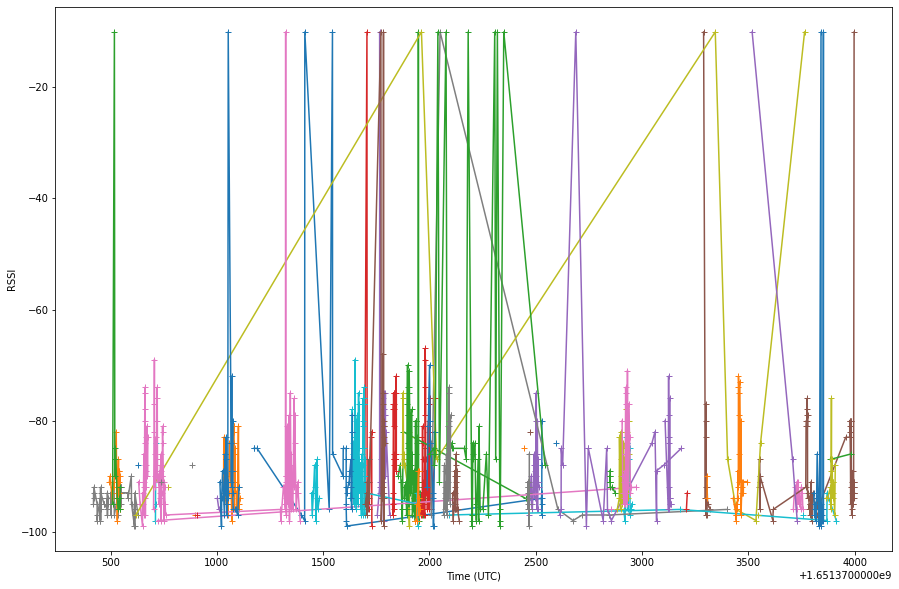

In [16]:
ndf = pd.read_pickle("test.pkl")
plt.figure(figsize=(15, 10))
ndf = ndf.iloc[:100]
ndf = ndf.loc[ndf['reps'] >= 0]
ndf = ndf.loc[ndf['reps'] <= 100]
for index, row in ndf.iterrows():
    plt.plot(row["time"], row["rssi"], label=row["mac"], marker='+')
plt.xlabel("Time (UTC)")
plt.ylabel("RSSI")
plt.show()

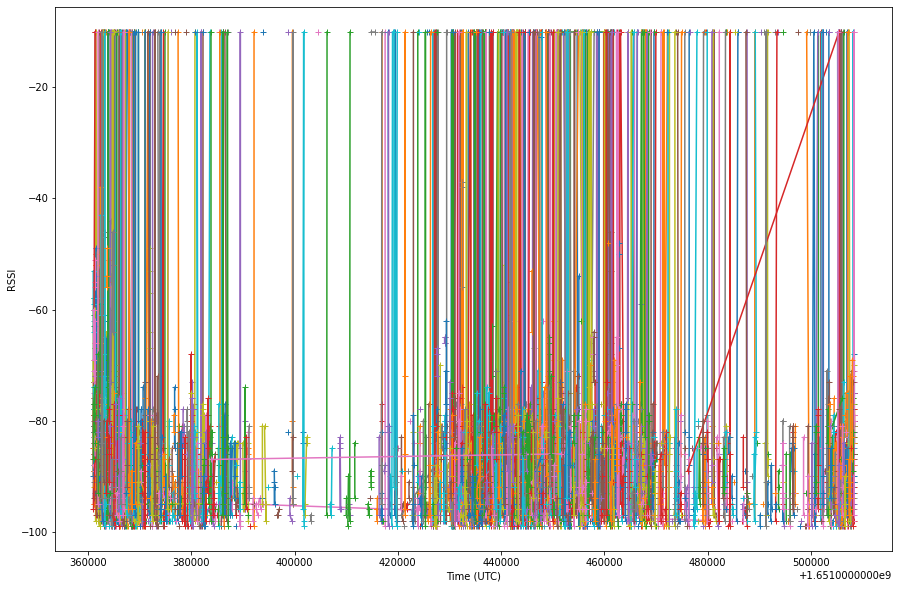

In [19]:
ndf = pd.read_pickle("cory_elevator.pkl")
plt.figure(figsize=(15, 10))
ndf = ndf.loc[ndf['reps'] <= 5]
# ndf = ndf.loc[ndf['reps'] >= 10]
for index, row in ndf.iterrows():
    plt.plot(row["time"], row["rssi"], label=row["mac"], marker='+')
plt.xlabel("Time (UTC)")
plt.ylabel("RSSI")
plt.show()

# Notes

1. Filter based on duration of visibility
2. Get different location
3. Filter based on manufacturer for phones
